## IEOR 242 - Data Analysis - HW2

### Problem 3

In [3]:
data = read.csv('framingham.csv')

In [4]:
head(data)

male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,39,College,0,0,0,0,0,0,195,106.0,70,26.97,80,77,0
0,46,High school/GED,0,0,0,0,0,0,250,121.0,81,28.73,95,76,0
1,48,Some high school,1,20,0,0,0,0,245,127.5,80,25.34,75,70,0
0,61,Some college/vocational school,1,30,0,0,1,0,225,150.0,95,28.58,65,103,1
0,46,Some college/vocational school,1,23,0,0,0,0,285,130.0,84,23.10,85,85,0
0,43,High school/GED,0,0,0,0,1,0,228,180.0,110,30.30,77,99,0


In [5]:
summary(data)

      male             age                                 education   
 Min.   :0.0000   Min.   :32.00   College                       : 423  
 1st Qu.:0.0000   1st Qu.:42.00   High school/GED               :1101  
 Median :0.0000   Median :49.00   Some college/vocational school: 608  
 Mean   :0.4437   Mean   :49.55   Some high school              :1526  
 3rd Qu.:1.0000   3rd Qu.:56.00                                        
 Max.   :1.0000   Max.   :70.00                                        
 currentSmoker      cigsPerDay         BPMeds        prevalentStroke   
 Min.   :0.0000   Min.   : 0.000   Min.   :0.00000   Min.   :0.000000  
 1st Qu.:0.0000   1st Qu.: 0.000   1st Qu.:0.00000   1st Qu.:0.000000  
 Median :0.0000   Median : 0.000   Median :0.00000   Median :0.000000  
 Mean   :0.4891   Mean   : 9.025   Mean   :0.03034   Mean   :0.005741  
 3rd Qu.:1.0000   3rd Qu.:20.000   3rd Qu.:0.00000   3rd Qu.:0.000000  
 Max.   :1.0000   Max.   :70.000   Max.   :1.00000   Max.   :1.0

In [6]:
library(dplyr)
library(ggplot2)
library(caTools) # splits
library(rpart) # CART
library(rpart.plot) # CART plotting

Warning message:
"package 'rpart' was built under R version 3.5.2"Warning message:
"package 'rpart.plot' was built under R version 3.5.2"

In [7]:
data$TenYearCHD <- as.factor(data$TenYearCHD)

In [8]:
set.seed(40)
split <- sample.split(data$TenYearCHD, 0.7)

In [9]:
train <- filter(data, split == TRUE)
test <- filter(data, split == FALSE)

In [10]:
table(train$TenYearCHD)


   0    1 
2171  390 

Accuracy of the baseline on train: 

In [11]:
2171/(2171+390)

[1] 0.8477157

In [12]:
table(test$TenYearCHD)


  0   1 
930 167 

Accuracy of the baseline on test:

In [13]:
930/(930+167)

[1] 0.8477666

#### Logistic Regression Model 

In [14]:
mod <- glm(TenYearCHD ~. , data=train, family="binomial")

In [15]:
summary(mod)


Call:
glm(formula = TenYearCHD ~ ., family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7607  -0.5989  -0.4198  -0.2720   2.9539  

Coefficients:
                                          Estimate Std. Error z value Pr(>|z|)
(Intercept)                             -8.8502864  0.8495801 -10.417  < 2e-16
male                                     0.6464851  0.1312570   4.925 8.42e-07
age                                      0.0630091  0.0080237   7.853 4.07e-15
educationHigh school/GED                -0.3344576  0.2094873  -1.597  0.11037
educationSome college/vocational school -0.2293129  0.2314140  -0.991  0.32172
educationSome high school               -0.0918412  0.1939334  -0.474  0.63581
currentSmoker                           -0.0254385  0.1927465  -0.132  0.89500
cigsPerDay                               0.0196968  0.0074629   2.639  0.00831
BPMeds                                   0.3606900  0.2729663   1.321  0.18638
prevalent

We are now building a new model using only variable where the probability that the coefficient is zero is bellow 0.2 (to keep a quite large number of features in this first selection.

In [16]:
mod2 <- glm(TenYearCHD ~ male+age+cigsPerDay+totChol+sysBP+glucose+education+BPMeds+diaBP, data=train, family="binomial")

In [17]:
summary(mod2)


Call:
glm(formula = TenYearCHD ~ male + age + cigsPerDay + totChol + 
    sysBP + glucose + education + BPMeds + diaBP, family = "binomial", 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7934  -0.5969  -0.4215  -0.2736   2.9623  

Coefficients:
                                         Estimate Std. Error z value Pr(>|z|)
(Intercept)                             -8.765003   0.655053 -13.381  < 2e-16
male                                     0.649496   0.130378   4.982 6.31e-07
age                                      0.063072   0.007948   7.935 2.10e-15
cigsPerDay                               0.018501   0.004920   3.761 0.000169
totChol                                  0.004016   0.001315   3.055 0.002250
sysBP                                    0.020180   0.004246   4.753 2.01e-06
glucose                                  0.005533   0.001994   2.776 0.005507
educationHigh school/GED                -0.336911   0.209041  -1.612 0.107027
educatio

##### 1) i) The equation of the model is:

$ Pr(\text{TenYearCHD} = 1) = \frac{1}{1 + \text{exp}(-y)} $

With  y = -8.765 + 0.6495 * **male** + 0.0631 * **age** + 0.0185 * **cigsPerDay** + 0.004 * **totChol** + 0.0202 * **sysBP** + 0.0055 * **glucose** - 0.3369 * **educationHighSchool/GED** - 0.2254 * **educationCollege** - 0.0687 * **educationHighSchool** + 0.4002 * **BPMeds** - 0.0089 * **diaBP**

##### 1) ii) The most important features in this model are:

- male
- age
- cigsPerDay
- totChol
- sysBP
- glucose

The new model is then:

In [18]:
modF <- glm(TenYearCHD ~ male+age+cigsPerDay+totChol+sysBP+glucose, data=train, family="binomial")

In [19]:
summary(modF)


Call:
glm(formula = TenYearCHD ~ male + age + cigsPerDay + totChol + 
    sysBP + glucose, family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7794  -0.6060  -0.4272  -0.2725   2.9337  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -9.455278   0.579669 -16.312  < 2e-16 ***
male         0.655365   0.127841   5.126 2.95e-07 ***
age          0.067461   0.007637   8.833  < 2e-16 ***
cigsPerDay   0.018100   0.004907   3.689 0.000225 ***
totChol      0.003886   0.001307   2.973 0.002948 ** 
sysBP        0.017307   0.002588   6.688 2.27e-11 ***
glucose      0.005492   0.001978   2.776 0.005500 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2185.3  on 2560  degrees of freedom
Residual deviance: 1928.9  on 2554  degrees of freedom
AIC: 1942.9

Number of Fisher Scoring iterations: 5


New equation:

$ Pr(\text{TenYearCHD} = 1) = \frac{1 }{1 + \text{exp}(-9.46 + 0.655 \text{Male} + 0.067 \text{Age} + 0.018 \text{cigsPerDay} + 0.004 \text{totChol} + 0.018 \text{sysBP} + 0.005 \text{Glucose})} $
$ = \frac{1}{1 + \text{exp}(-y)} $

With y = -9.46 + 0.655 * **male** + 0.067 * **age** + 0.018 * **cigsPerDay** + 0.004 * **totChol** + 0.018 * **sysBP** + 0.005 * **glucose**

Let's study more deeply the impact of age on a patient's predicted of developing CHD in the next ten years.

In [20]:
summary(data$age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  32.00   42.00   49.00   49.55   56.00   70.00 

In [21]:
summary(data$TenYearCHD)

0    1 
3101  557

The coefficient of age is 0.063, which mean the older the patient, the higher the probability of developping CHD. For instance, if you are 60 instead of 40 will improve your TenYearCHD prediction by 1.26.

In [22]:
mod_age =  glm(TenYearCHD ~ age, data=train, family="binomial")

In [23]:
summary(mod_age)


Call:
glm(formula = TenYearCHD ~ age, family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0381  -0.6292  -0.4523  -0.3605   2.4755  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -5.774368   0.366368  -15.76   <2e-16 ***
age          0.078803   0.006782   11.62   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2185.3  on 2560  degrees of freedom
Residual deviance: 2039.3  on 2559  degrees of freedom
AIC: 2043.3

Number of Fisher Scoring iterations: 5


##### iii) Suppose that you wish to determine the optimal strategy for assigning which patients receive the medication. Given your colleague’s analysis of the costs and beneﬁts associated with the recently approved treatment, identify a threshold value of p such that it is optimal to prescribe the medication to a patient if and only if their 10-year CHD risk exceeds p.

The equation to solve is when giving medication yield to lower cost than to giving them:

$ 6 (1 - \frac{p}{4}) + \frac{56p}{4} < 50p $ 

Which gives us: $ p_{thresold} = 0.16 $

##### iv) Describe the test set performance of the logistic regression model, using the threshold identiﬁed in part (iii) to separate patients into those who are at high risk for CHD (risk exceeding the threshold p) and those who are at low risk for CHD (risk below the threshold p). State the model’s accuracy, True Positive Rate (TPR), and False Positive Rate (FPR), and describe these three metrics in a way that is accessible to a non-technical audience.

In [24]:
prediction =  predict(mod, newdata=test, type="response")

In [25]:
summary(prediction)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.01072 0.06417 0.11497 0.15678 0.21020 0.92513 

In [26]:
table(test$TenYearCHD, prediction >= 0.16)

   
    FALSE TRUE
  0   641  289
  1    64  103

Accuracy

In [27]:
(641+103)/(641+103+64+289)

[1] 0.6782133

True Positive Rate (Actual Class is True for All): 

In [28]:
103/(64+103)

[1] 0.6167665

False Positive Rate (Actual Class is False for All):

In [29]:
289/(289+641)

[1] 0.3107527

Non technical description: 

**True Positive Rate** : This is the ratio of the number of people we predicted that they will have the disease and that will actually have the disease with the overall number of people with the disease.

**False Positive Rate** : This is the ratio of the number of people we predicted that they will have the disease but won't have it with the overall number of people that will not have the disease.

**Accuracy** : Ratio of the people that were well classified with the overall number of people.


This is when we predict that someone will have the disease but he actually does not have the disease. 
 The TPR is the ratio of those individuals with the total number of individual that

##### v) Expected economic cost per patient

In [30]:
testPred = predict(modF, newdata=test, type='response')

In [31]:
test$Prediction = testPred

In [32]:
head(test)

male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,Prediction
0,46,High school/GED,0,0,0,0,0,0,250,121,81.0,28.73,95,76,0,0.05370563
0,41,Some college/vocational school,0,0,1,0,1,0,332,124,88.0,31.31,65,84,0,0.05776760
0,38,High school/GED,1,20,0,0,1,0,221,140,90.0,21.35,95,70,1,0.05398608
1,41,High school/GED,0,0,0,0,0,0,195,139,88.0,26.88,85,65,0,0.07491065
0,42,High school/GED,1,30,0,0,0,0,190,108,70.5,21.59,72,85,0,0.04721828
0,52,Some college/vocational school,1,20,0,0,0,0,215,132,82.0,25.11,71,75,0,0.11370999


In [33]:
test$cost1  <- with(test, ifelse((Prediction >= 0.16)&(TenYearCHD==1), 1, 0))
test$cost2  <- with(test, ifelse((Prediction >= 0.16)&(TenYearCHD==0), 1, 0))
test$cost3  <- with(test, ifelse((Prediction < 0.16)&(TenYearCHD==1), 1, 0))
test$cost4  <- with(test, ifelse((Prediction < 0.16)&(TenYearCHD==0), 1, 0))

Cost 1 are all the people that will need to pay $560 000

Cost 2 are all the people that will need to pay $60 000

Cost3 are all the people that will need to pay $500 000

Cost4 are all the people that will need to pay $0

In [34]:
test

male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,...,diaBP,BMI,heartRate,glucose,TenYearCHD,Prediction,cost1,cost2,cost3,cost4
0,46,High school/GED,0,0,0,0,0,0,250,...,81.0,28.73,95,76,0,0.05370563,0,0,0,1
0,41,Some college/vocational school,0,0,1,0,1,0,332,...,88.0,31.31,65,84,0,0.05776760,0,0,0,1
0,38,High school/GED,1,20,0,0,1,0,221,...,90.0,21.35,95,70,1,0.05398608,0,0,1,0
1,41,High school/GED,0,0,0,0,0,0,195,...,88.0,26.88,85,65,0,0.07491065,0,0,0,1
0,42,High school/GED,1,30,0,0,0,0,190,...,70.5,21.59,72,85,0,0.04721828,0,0,0,1
0,52,Some college/vocational school,1,20,0,0,0,0,215,...,82.0,25.11,71,75,0,0.11370999,0,0,0,1
0,59,Some high school,0,0,0,0,1,0,209,...,85.0,20.77,90,88,1,0.17028996,1,0,0,0
1,37,High school/GED,0,0,0,0,1,0,225,...,92.5,38.53,95,83,0,0.05630831,0,0,0,1
0,41,High school/GED,1,1,0,0,0,0,237,...,78.0,23.28,75,74,0,0.03796318,0,0,0,1
1,54,High school/GED,0,0,0,0,0,0,195,...,83.5,26.21,75,100,0,0.17285219,0,1,0,0


In [35]:
dim(test)

[1] 1097   21

Will have to pay $560 000

In [36]:
summary(test$cost1)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.00000 0.00000 0.09845 0.00000 1.00000 

Will have to pay $60 000

In [37]:
summary(test$cost2)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.2589  1.0000  1.0000 

Will have to pay $500 000

In [38]:
summary(test$cost3)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.00000 0.00000 0.05378 0.00000 1.00000 

Will have to pay $0

In [39]:
summary(test$cost4)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  1.0000  0.5889  1.0000  1.0000 

From this model, the average cost per patient is $97 556

This prediction has been done under the assumption that CHD outcomes are not affected by the treatment decision which is probably not the case. Indeed, taking the tratment is likely to decrease the probability of a positive CHD outcome. 

We can make the assumption that taking the medication will divide by four the probability that you develop CHD. Therefore, you will develop 

In [40]:
test$cost1  <- with(test, ifelse((Prediction >= 4*0.16), 1, 0))
test$cost2  <- with(test, ifelse((Prediction < 4*0.16)&(Prediction >= 0.16), 1, 0))
test$cost3  <- with(test, ifelse((Prediction < 0.16)&(TenYearCHD==1), 1, 0))
test$cost4  <- with(test, ifelse((Prediction < 0.16)&(TenYearCHD==0), 1, 0))

In [41]:
test

male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,...,diaBP,BMI,heartRate,glucose,TenYearCHD,Prediction,cost1,cost2,cost3,cost4
0,46,High school/GED,0,0,0,0,0,0,250,...,81.0,28.73,95,76,0,0.05370563,0,0,0,1
0,41,Some college/vocational school,0,0,1,0,1,0,332,...,88.0,31.31,65,84,0,0.05776760,0,0,0,1
0,38,High school/GED,1,20,0,0,1,0,221,...,90.0,21.35,95,70,1,0.05398608,0,0,1,0
1,41,High school/GED,0,0,0,0,0,0,195,...,88.0,26.88,85,65,0,0.07491065,0,0,0,1
0,42,High school/GED,1,30,0,0,0,0,190,...,70.5,21.59,72,85,0,0.04721828,0,0,0,1
0,52,Some college/vocational school,1,20,0,0,0,0,215,...,82.0,25.11,71,75,0,0.11370999,0,0,0,1
0,59,Some high school,0,0,0,0,1,0,209,...,85.0,20.77,90,88,1,0.17028996,0,1,0,0
1,37,High school/GED,0,0,0,0,1,0,225,...,92.5,38.53,95,83,0,0.05630831,0,0,0,1
0,41,High school/GED,1,1,0,0,0,0,237,...,78.0,23.28,75,74,0,0.03796318,0,0,0,1
1,54,High school/GED,0,0,0,0,0,0,195,...,83.5,26.21,75,100,0,0.17285219,0,1,0,0


In [42]:
summary(test$cost1)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.000000 0.000000 0.000000 0.002735 0.000000 1.000000 

In [43]:
summary(test$cost2)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.3546  1.0000  1.0000 

In [44]:
summary(test$cost3)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.00000 0.00000 0.05378 0.00000 1.00000 

In [45]:
summary(test$cost4)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  1.0000  0.5889  1.0000  1.0000 

Now, the average cost per patient is $49 698

##### vi) Consider a simple baseline model that predicts none of the patients are at high risk for CHD and therefore does not recommend treatment for any of the patients. Describe the test set performance of the baseline model in terms of accuracy, TPR, and FPR, as well as expected economic cost per patient.

In [46]:
summary(test)

      male             age                                 education  
 Min.   :0.0000   Min.   :33.00   College                       :131  
 1st Qu.:0.0000   1st Qu.:42.00   High school/GED               :322  
 Median :0.0000   Median :49.00   Some college/vocational school:176  
 Mean   :0.4549   Mean   :49.67   Some high school              :468  
 3rd Qu.:1.0000   3rd Qu.:57.00                                       
 Max.   :1.0000   Max.   :70.00                                       
 currentSmoker      cigsPerDay         BPMeds        prevalentStroke   
 Min.   :0.0000   Min.   : 0.000   Min.   :0.00000   Min.   :0.000000  
 1st Qu.:0.0000   1st Qu.: 0.000   1st Qu.:0.00000   1st Qu.:0.000000  
 Median :0.0000   Median : 0.000   Median :0.00000   Median :0.000000  
 Mean   :0.4932   Mean   : 8.667   Mean   :0.02644   Mean   :0.006381  
 3rd Qu.:1.0000   3rd Qu.:20.000   3rd Qu.:0.00000   3rd Qu.:0.000000  
 Max.   :1.0000   Max.   :70.000   Max.   :1.00000   Max.   :1.000000  

In [47]:
test$HR  <- with(test, ifelse((Prediction >= 0.16), 1, 0))

In [48]:
summary(test$TenYearCHD)

0   1 
930 167

In [49]:
(930/(930+167))

[1] 0.8477666

For this baseline model, 

**Accuracy** = percentage of non high risk = 0.8477

**TPR** = 0

**FPR** = 0

Expected economic cost per patient:
No patient are recommended to take the treatment. Therefore the cost is:
* $ 0 for the 0.8477 that won't have CHD
* 500 000 for the remaining ones that will have CHD

Which make an average cost per patient of $76 150 which is significantly higher than with the model that provide treatment to High Risk patients.

Therefore, the model with treatment is economically preferable.

summary(test$sysBP)

##### iv) We retake the equation previously found

$ Pr(\text{TenYearCHD} = 1) = \frac{1 }{1 + \text{exp}(-9.46 + 0.655 \text{Male} + 0.067 \text{Age} + 0.018 \text{cigsPerDay} + 0.004 \text{totChol} + 0.018 \text{sysBP} + 0.005 \text{Glucose})} $
$ = \frac{1}{1 + \text{exp}(-y)} $
 

In [50]:
indiv <- data.frame('male'= 0,'age'=51, 'education'='College', 'currentSmoker'=1, 'cigsPerDay'=20, 'BPMeds'=0, 'prevalentStroke'=0,'prevalentHyp'=1,'diabetes'=0,
'totChol'=220, 'sysBP'=140, 'diaBP'=100, 'BMI'=31, 'heartRate'=59, 'glucose'=78)
indiv_data

ERROR: Error in eval(expr, envir, enclos): objet 'indiv_data' introuvable


In [51]:
pred = predict(mod, newdata = indiv, type='response')

In [52]:
pred

1 
0.1363419

Based on the threshold from the decision tree, the physician should not prescribe the preventive medication for this patient.

###### b) ROC curve

[1] 0.7224905

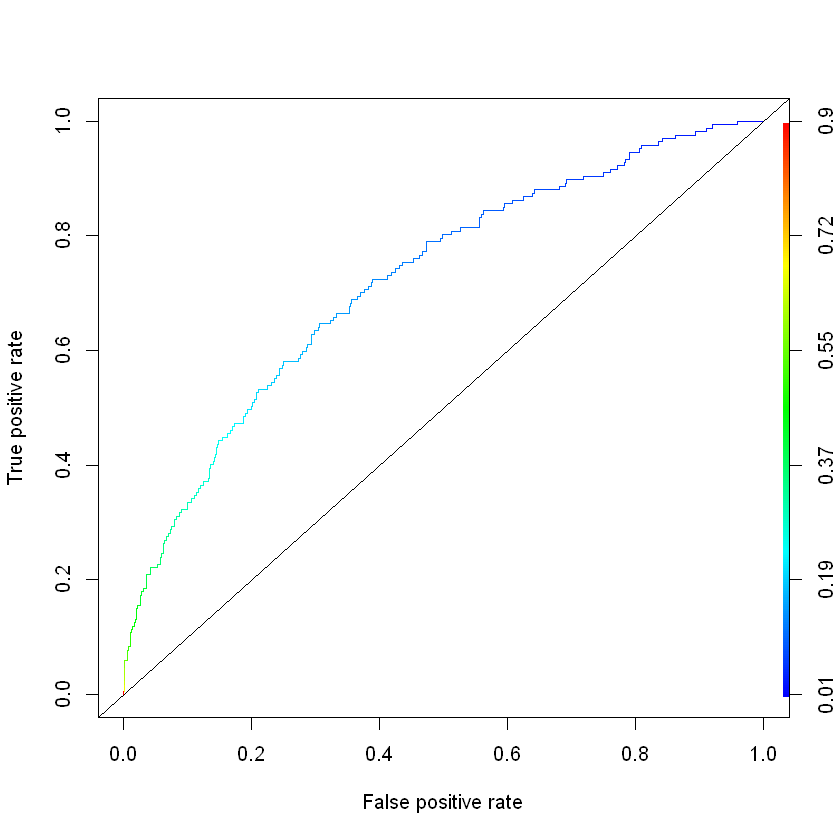

In [54]:
rocr.log.pred <- prediction(testPred, test$TenYearCHD)
logPerformance <- performance(rocr.log.pred, "tpr", "fpr")
plot(logPerformance, colorize = TRUE)
abline(0, 1)
as.numeric(performance(rocr.log.pred, "auc")@y.values)

##### The AUC is 0.722

We can see from the color that the optimal thresold is around 0.16 from a financial point of view. Yet, to make a decision, one need to decide what is the goal? To optimize the ratio TPR/FPR? Is it better to have a low FPR? I think that on this particular problem, related to people health, it is better to have a lower FPR and therefore try to catch the maximum people that will have the CHD. From this point of view the goal is to optimize the health of people. 

###### c)

#### The equation to solve is:

300 000 * p/4  +  C  = 300 000 * p  which egalize the price expectation in the both situation: with medication and without

AUC: 0.722

##### d)

Ethically we should limit the false negatives, we don't want to let people that will get sick without treatment. The way we analysed the probel in this homework is ethically concerning as we only cared about financial benefits, but we are dealing with people heath. The first metric to optimize is the number of people that get CHD (should be minimized).